In [40]:
from emoinvest.stock_data_importer.stock_import import get_single_stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(precision=2)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from datetime import date

%matplotlib inline


height has been deprecated.



In [41]:
# Abkürzung der Aktie, ticker symbol, mit '' angeben
ticker = 'HRL'
von = '2017-01-01'
bis = date.today()
# danach Zellen mit Shift+R durchlaufen lassen (so lange mehrfach drücken, bis man am ende des notebooks ist)

In [42]:
import os, re, sys, time, datetime, copy, shutil
import pandas

import matplotlib.pyplot as plt

df2 = get_single_stock(ticker, von, bis)

temp_data_set = df2

temp_data_set['adj_close'].rolling(20).mean()

temp_data_set['20d_ma'] = temp_data_set['adj_close'].rolling(20).mean()
temp_data_set['50d_ma'] = temp_data_set['adj_close'].rolling(50).mean()
temp_data_set['Bol_upper'] = temp_data_set['adj_close'].rolling(20).mean() + 2*(temp_data_set['close'].rolling(20).std())
temp_data_set['Bol_lower'] = temp_data_set['adj_close'].rolling(20).mean() - 2*(temp_data_set['close'].rolling(20).std())
temp_data_set['Bol_BW'] = ((temp_data_set['Bol_upper'] - temp_data_set['Bol_lower'])/temp_data_set['20d_ma'])*100
temp_data_set['Bol_BW_200MA'] = temp_data_set['Bol_BW'].rolling(50).mean()
temp_data_set['Bol_BW_200MA'] = temp_data_set['Bol_BW_200MA'].fillna(method='backfill')
temp_data_set['20d_exma'] = temp_data_set['adj_close'].ewm(span=20).mean()
temp_data_set['50d_exma'] = temp_data_set['adj_close'].ewm(span=50).mean()
all_stock_df = temp_data_set


In [43]:
all_stock_df.tail(5)

,high,low,open,close,volume,adj_close,ticker_symbol,20d_ma,50d_ma,Bol_upper,Bol_lower,Bol_BW,Bol_BW_200MA,20d_exma,50d_exma
Date,,,,,,,,,,,,,,,
2018-11-05,44.490,43.290,43.290,44.220,3403400.000,44.220,HRL,41.682,40.575,44.377,38.987,12.932,10.825,42.018,40.603
2018-11-06,44.090,43.220,43.730,44.080,3993700.000,44.080,HRL,41.859,40.701,44.698,39.021,13.561,10.917,42.214,40.739
2018-11-07,44.270,43.570,44.190,44.140,2791400.000,44.140,HRL,42.073,40.829,44.932,39.214,13.591,11.026,42.398,40.873
2018-11-08,44.670,44.000,44.130,44.540,1893000.000,44.540,HRL,42.325,40.955,45.134,39.516,13.271,11.144,42.602,41.017
2018-11-09,45.130,44.470,44.590,45.020,1849100.000,45.020,HRL,42.601,41.088,45.349,39.853,12.901,11.261,42.832,41.174


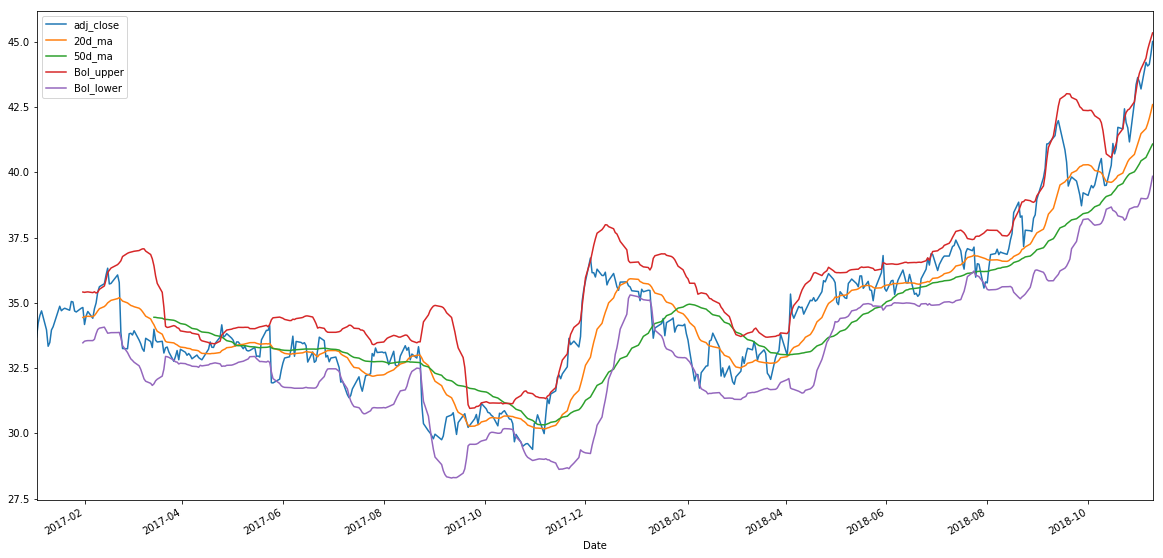

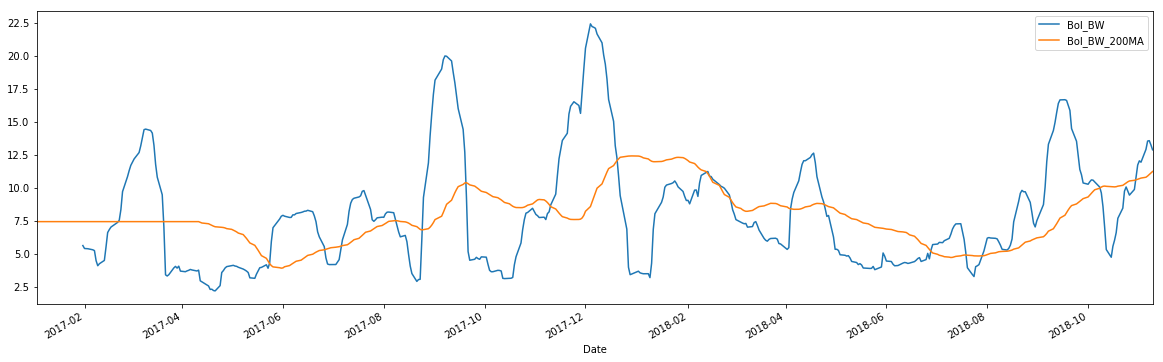

In [44]:
all_stock_df.plot(x=all_stock_df.index, y=['adj_close','20d_ma','50d_ma','Bol_upper','Bol_lower' ], figsize=(20,10))
all_stock_df.plot(x=all_stock_df.index, y=['Bol_BW','Bol_BW_200MA' ], figsize=(20,6))
plt.show()